In [1]:
from grey_model import GreyModel
import matplotlib.pyplot as plt
import astropy.constants as c
import astropy.units as u

# Set font sizes
plt.rcParams.update({'font.size': 14})  # Default font size
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12

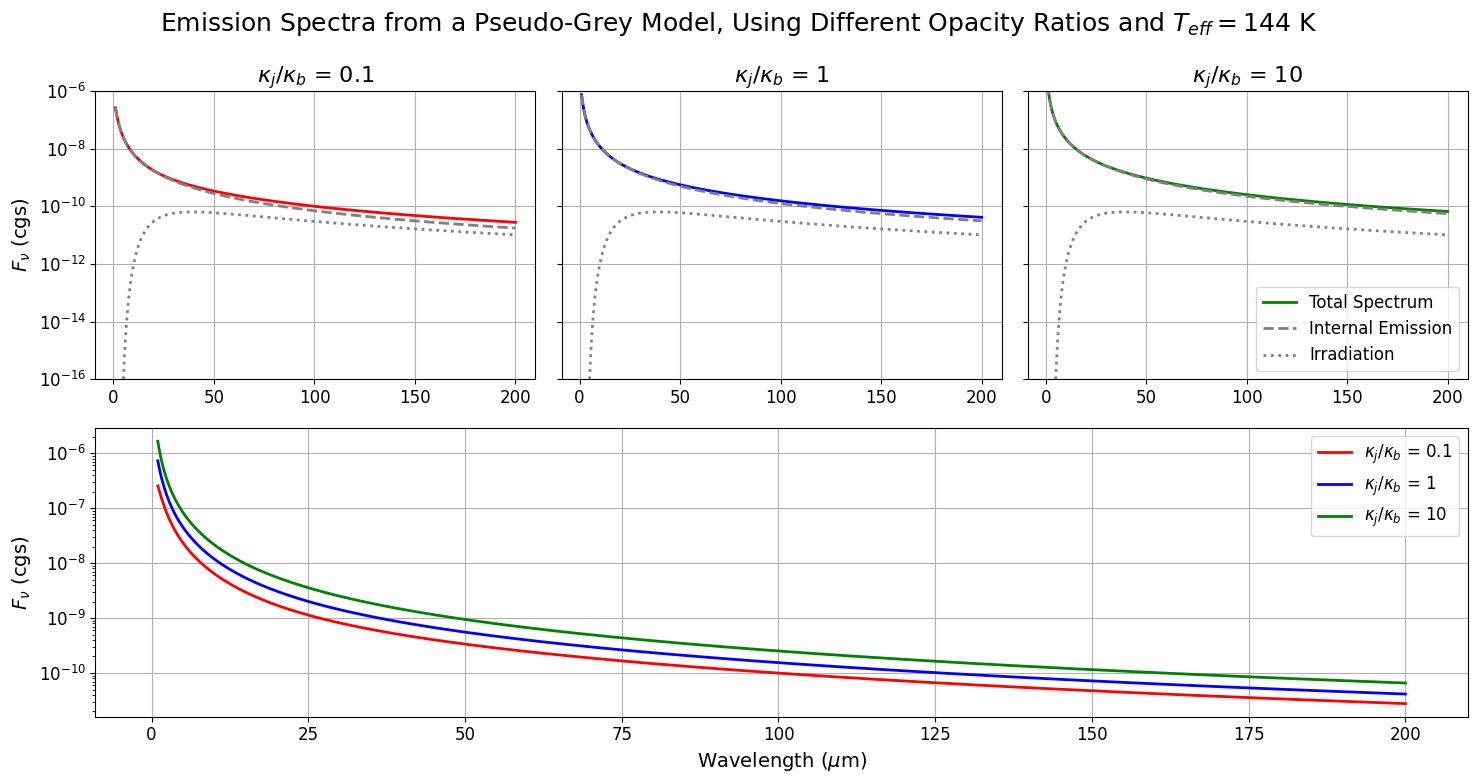

In [17]:
kappa_ratios = [0.1, 1, 10]
cols = ['r', 'b', 'g']
fig = plt.figure(figsize=(15, 8))

# Create grid: 2 rows, 3 columns with shared y-axis for top row
# Top row: 3 individual plots with shared y-axis
axes_top = []
for i in range(3):
    if i == 0:
        ax = plt.subplot(2, 3, i+1)
        axes_top.append(ax)
    else:
        ax = plt.subplot(2, 3, i+1, sharey=axes_top[0])
        axes_top.append(ax)

# Bottom row: 1 plot spanning all 3 columns
ax_bottom = plt.subplot(2, 1, 2)

# Store data for the bottom plot
total_spectra = []
wavelengths = None

for i, kappa_ratio in enumerate(kappa_ratios):
    model = GreyModel(kappa_ratio=kappa_ratio, D=1e8, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Store for bottom plot
    total_spectra.append(spec)
    if wavelengths is None:
        wavelengths = wavelength
    
    # Top row individual plots
    axes_top[i].semilogy(wavelength, spec, cols[i], linewidth=2, label='Total Spectrum')
    axes_top[i].semilogy(wavelength, local, 'gray', linewidth=2, label='Internal Emission', linestyle='--')
    axes_top[i].semilogy(wavelength, irr, 'gray', linewidth=2, label='Irradiation', linestyle=':')
    axes_top[i].set_title(f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}', fontsize=title_fontsize)
    axes_top[i].grid()
    axes_top[i].set_ylim(10**-16, 10**-6)
    axes_top[i].tick_params(axis='x', which='major', labelsize=12)
    
    # Only show y-axis label and tick labels on the leftmost plot
    if i == 0:
        axes_top[i].set_ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)
        axes_top[i].tick_params(axis='y', which='major', labelsize=12)
    else:
        # Hide y-axis tick labels for middle and right plots
        axes_top[i].tick_params(axis='y', which='major', labelleft=False)

# Bottom plot: all total spectra together
colors = ['red', 'blue', 'green']
for i, (kappa_ratio, spec) in enumerate(zip(kappa_ratios, total_spectra)):
    ax_bottom.semilogy(wavelengths, spec, color=colors[i], linewidth=2, 
                      label=f'$\\kappa_j/\\kappa_b$ = {kappa_ratio}')

ax_bottom.set_xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
ax_bottom.set_ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)
ax_bottom.legend(fontsize=legend_fontsize)
ax_bottom.grid()
ax_bottom.tick_params(axis='both', which='major', labelsize=12)

# Add legend only to the last top plot
axes_top[2].legend(loc='lower right', fontsize=legend_fontsize)

fig.suptitle('Emission Spectra from a Pseudo-Grey Model, Using Different Opacity Ratios and $T_{eff}=144$ K', fontsize=18)
plt.tight_layout()
#plt.savefig('figures/spectrum_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

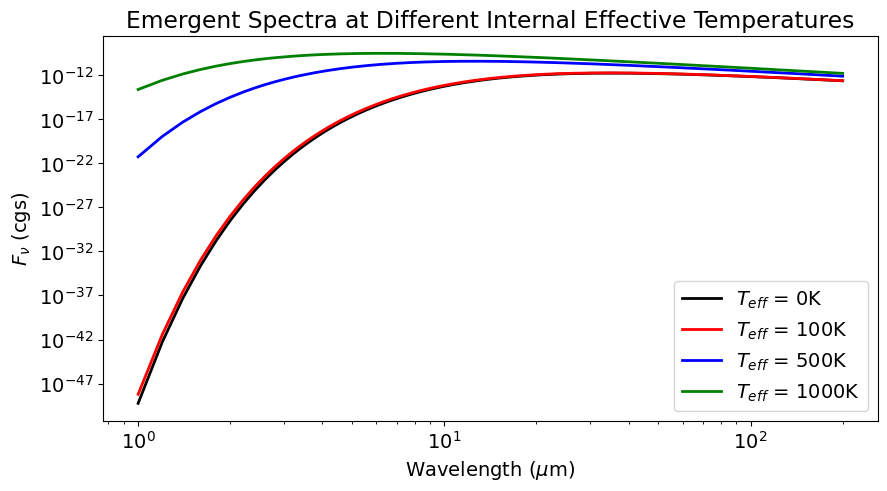

In [34]:
temperatures = [0, 100, 500, 1000]
cols = ['k', 'r', 'b', 'g']
plt.figure(figsize=(10,5))

for i, t in enumerate(temperatures):
    model = GreyModel(Teff=t, kappa_ratio=1, D=1e12, include_molecules=False)
    spec = model.final_spectrum
    local = model.local_spectrum
    irr = model.irradiated_spectrum
    wavelength = (c.c/model.freqs).to_value(u.um)
    
    # Top row individual plots
    plt.loglog(wavelength, spec, color=cols[i], linewidth=2, label=f'$T_{{eff}}$ = {t}K')
    #plt.xlim(0,50)
    plt.legend()
    plt.title('Emergent Spectra at Different Internal Effective Temperatures')
    plt.xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
    plt.ylabel(r'$F_\nu$ (cgs)', fontsize=label_fontsize)

[Abundances] T=811.1984955483748 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1987616260133 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1992292596556 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.2000511287905 KK, P=9.78e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundan

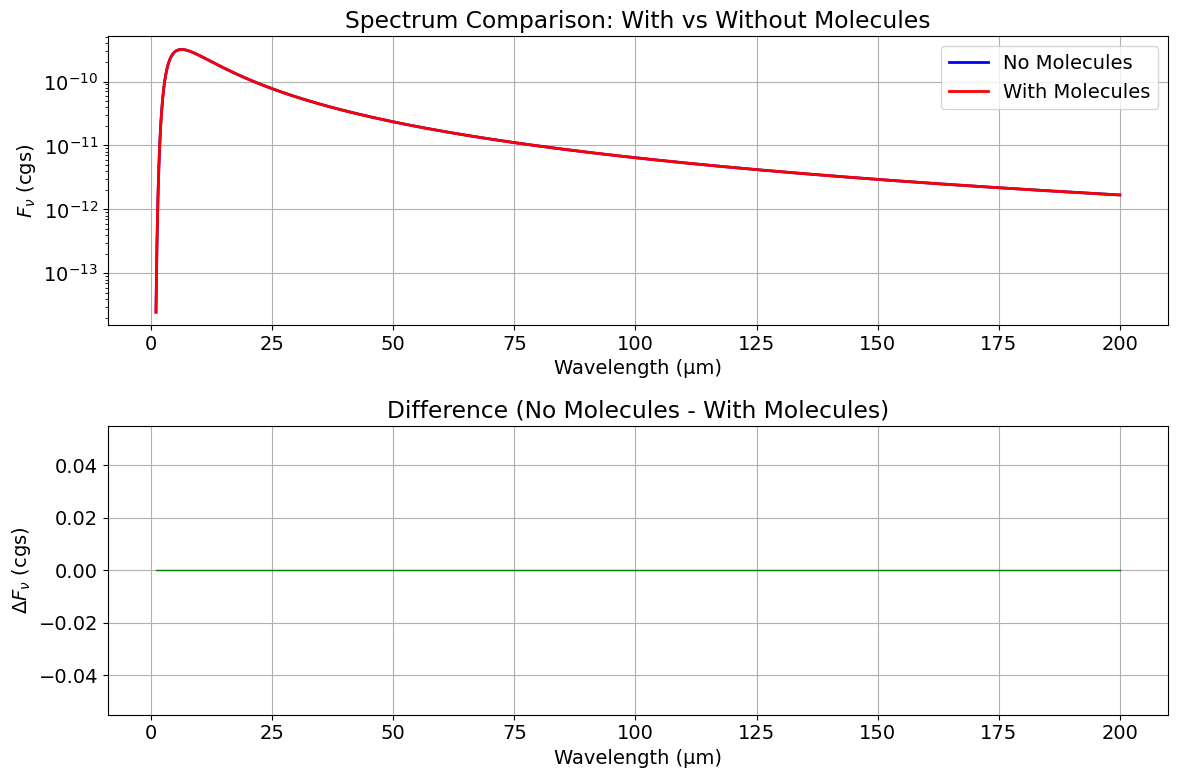

Max continuum flux: 3.18e-10 Hz3 s3 J / m2
[Abundances] T=811.1984955483748 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1987616260133 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.1992292596556 KK, P=9.77e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 14N-1H3: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] 12C-1H4: 8.73e+41 1 / K cm^-3 (mixing ratio: 1.00e-02)
[Abundances] T=811.2000511287905 KK, P=9.78e+30, n_total=8.73e+43 1 / K cm^-3
[Abundances] 1H2-16O: 8.73e+41 1 

In [5]:
# Replace your current cell with this debugging version
model_no_mol = GreyModel(Teff=1000, include_molecules=False)
model_with_mol = GreyModel(Teff=1000, include_molecules=True)

w = (c.c/model_no_mol.freqs).to_value(u.um)

# Plot comparison
plt.figure(figsize=(12, 8))

# Top plot: full spectrum comparison
plt.subplot(2, 1, 1)
plt.semilogy(w, model_no_mol.final_spectrum, 'b-', linewidth=2, label='No Molecules')
plt.semilogy(w, model_with_mol.final_spectrum, 'r-', linewidth=2, label='With Molecules')
plt.xlabel('Wavelength (μm)')
plt.ylabel(r'$F_\nu$ (cgs)')
plt.legend()
plt.title('Spectrum Comparison: With vs Without Molecules')
plt.grid(True)

# Bottom plot: difference (to see absorption features)
plt.subplot(2, 1, 2)
difference = model_no_mol.final_spectrum - model_with_mol.final_spectrum
plt.plot(w, difference, 'g-', linewidth=1)
plt.xlabel('Wavelength (μm)')
plt.ylabel(r'$\Delta F_\nu$ (cgs)')
plt.title('Difference (No Molecules - With Molecules)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print some diagnostics
print(f"Max continuum flux: {model_no_mol.final_spectrum.max():.2e}")
print(f"Max molecular flux: {model_with_mol.final_spectrum.max():.2e}")
print(f"Max difference: {difference.max():.2e}")
print(f"Min difference: {difference.min():.2e}")

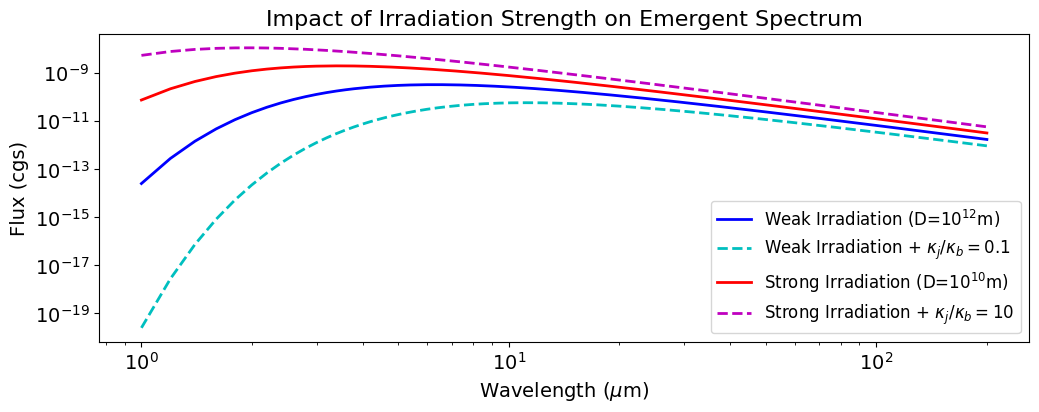

In [37]:
# looking at the impacts of strong irradiation

model_weak = GreyModel(Teff=1000, kappa_ratio=1, D=1e12, include_molecules=False)
model_weak_kappa = GreyModel(Teff=1000, kappa_ratio=0.1, D=1e12, include_molecules=False)
model_strong = GreyModel(Teff=1000, kappa_ratio=1, D=1e10, include_molecules=False)
model_strong_kappa = GreyModel(Teff=1000, kappa_ratio=10, D=1e10, include_molecules=False)

plt.figure(figsize=(12,4))
plt.loglog((c.c/model_weak.freqs).to_value(u.um), model_weak.final_spectrum, 'b-', linewidth=2, label='Weak Irradiation (D=$10^{12}$m)')
plt.loglog((c.c/model_weak_kappa.freqs).to_value(u.um), model_weak_kappa.final_spectrum, 'c--', linewidth=2, label='Weak Irradiation + $\\kappa_j/\\kappa_b=0.1$')
plt.loglog((c.c/model_strong.freqs).to_value(u.um), model_strong.final_spectrum, 'r-', linewidth=2, label='Strong Irradiation (D=$10^{10}$m)')
plt.loglog((c.c/model_strong_kappa.freqs).to_value(u.um), model_strong_kappa.final_spectrum, 'm--', linewidth=2, label='Strong Irradiation + $\\kappa_j/\\kappa_b=10$')
plt.xlabel(r'Wavelength ($\mu$m)', fontsize=label_fontsize)
plt.ylabel('Flux (cgs)', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.title('Impact of Irradiation Strength on Emergent Spectrum', fontsize=title_fontsize)
#plt.xlim(0,50)
#plt.grid()
plt.show()